In [ ]:
pip install psycopg2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
data=pd.read_csv('Loan 1.csv')
data.columns

C:\Users\sku.bi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [4]:
data1=data[['id','member_id','loan_amnt','funded_amnt','loan_status', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade']]
data1.head()

,id,member_id,loan_amnt,funded_amnt,loan_status,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,1077501,1296599,5000.0,5000.0,Fully Paid,4975.0,36 months,10.65,162.87,B,B2
1,1077430,1314167,2500.0,2500.0,Charged Off,2500.0,60 months,15.27,59.83,C,C4
2,1077175,1313524,2400.0,2400.0,Fully Paid,2400.0,36 months,15.96,84.33,C,C5
3,1076863,1277178,10000.0,10000.0,Fully Paid,10000.0,36 months,13.49,339.31,C,C1
4,1075358,1311748,3000.0,3000.0,Current,3000.0,60 months,12.69,67.79,B,B5


In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data1['loan_status'].apply(lambda x: x.split(' ')[0]=='Late').value_counts()

False    873431
True      13948
Name: loan_status, dtype: int64

In [7]:
data1[data1['loan_status'].apply(lambda x: x.split(' ')[0]=='Late')]

,id,member_id,loan_amnt,funded_amnt,loan_status,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
607,1060885,1292853,16950.0,16950.0,Late (31-120 days),16950.0,60 months,16.77,419.16,D,D2
749,1052346,1283902,20000.0,20000.0,Late (31-120 days),19975.0,60 months,18.25,510.60,D,D5
1644,1044130,1274473,20000.0,20000.0,Late (31-120 days),19975.0,60 months,14.27,468.17,C,C2
1918,1044073,1274411,17000.0,17000.0,Late (31-120 days),16975.0,60 months,19.03,441.28,E,E2
2135,1031022,1260445,18725.0,18725.0,Late (31-120 days),18450.0,60 months,17.27,468.09,D,D3
...,...,...,...,...,...,...,...,...,...,...,...
887276,37257620,40030388,25000.0,25000.0,Late (31-120 days),25000.0,36 months,20.99,941.75,E,E4
887280,35998858,38700420,5875.0,5875.0,Late (31-120 days),5875.0,36 months,15.59,205.37,D,D1
887322,37317288,40080027,10000.0,10000.0,Late (31-120 days),10000.0,60 months,23.99,287.63,F,F2
887337,36200493,38911833,19600.0,19600.0,Late (31-120 days),19600.0,60 months,14.31,459.22,C,C4


In [8]:
data1.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [9]:
def cl_loan_status(x):
    if x=='Late (31-120 days)' or x=='Late (16-30 days)':
        return 0
    elif x=='Fully Paid' or x=='Does not meet the credit policy. Status:Fully Paid':
        return 1
    elif x=='Current':
        return 2
    elif x=='Charged Off' or x=='Does not meet the credit policy. Status:Charged Off' :
        return 3
    elif x=='Issued':
        return 4
    elif x=='In Grace Period':
        return 5
    elif x=='Default':
        return 6
    else:
        return 9
data1['loanstatus']=data1['loan_status'].apply(lambda x: cl_loan_status(x))

C:\Users\sku.bi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
data1['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
887374     36 months
887375     36 months
887376     60 months
887377     60 months
887378     36 months
Name: term, Length: 887379, dtype: object

In [11]:
data1['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [12]:
def cl_term(x):
    if x==' 60 months':
        return 60
    elif x==' 36 months':
        return 36
data1['term1']=data1['term'].apply(lambda x: cl_term(x))

C:\Users\sku.bi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
data1.drop('loan_status', axis=1, inplace=True)
data1.drop('term', axis=1, inplace=True)

C:\Users\sku.bi\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
data1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,loanstatus,term1
0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,B,B2,1,36
1,1077430,1314167,2500.0,2500.0,2500.0,15.27,59.83,C,C4,3,60
2,1077175,1313524,2400.0,2400.0,2400.0,15.96,84.33,C,C5,1,36
3,1076863,1277178,10000.0,10000.0,10000.0,13.49,339.31,C,C1,1,36
4,1075358,1311748,3000.0,3000.0,3000.0,12.69,67.79,B,B5,2,60
...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,11.99,332.10,B,B5,2,36
887375,36441262,39152692,24000.0,24000.0,24000.0,11.99,797.03,B,B5,2,36
887376,36271333,38982739,13000.0,13000.0,13000.0,15.99,316.07,D,D2,2,60
887377,36490806,39222577,12000.0,12000.0,12000.0,19.99,317.86,E,E3,2,60


In [15]:
data1[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593
min,500.000000,500.000000,0.000000,5.320000,15.670000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000


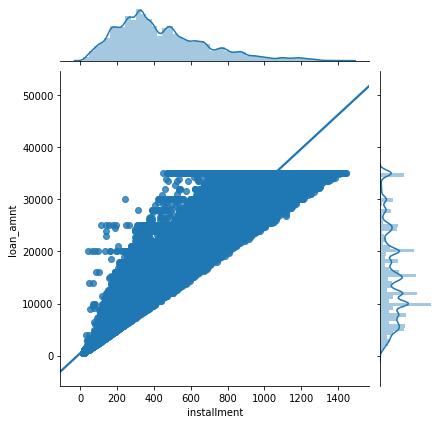

In [16]:
sns.jointplot(x='installment', y='loan_amnt', data=data1, kind='reg')

In [17]:
data2=data1[:887379:15]
data2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,loanstatus,term1
0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,B,B2,1,36
15,1069759,1304871,1000.0,1000.0,1000.0,16.29,35.31,D,D1,1,36
30,1032111,1261745,4375.0,4375.0,4375.0,7.51,136.11,A,A3,1,36
45,1051117,1282787,14000.0,14000.0,14000.0,9.91,451.15,B,B1,1,36
60,1069142,1287810,13000.0,13000.0,13000.0,12.69,293.74,B,B5,1,60
...,...,...,...,...,...,...,...,...,...,...,...
887310,37077455,39840207,15600.0,15600.0,15600.0,10.49,335.23,B,B3,2,60
887325,37147222,39919949,15000.0,15000.0,15000.0,15.59,361.52,D,D1,2,60
887340,34593584,37276900,35000.0,35000.0,35000.0,14.31,820.03,C,C4,2,60
887355,36331554,39042967,26950.0,26950.0,26950.0,8.19,846.88,A,A5,2,36


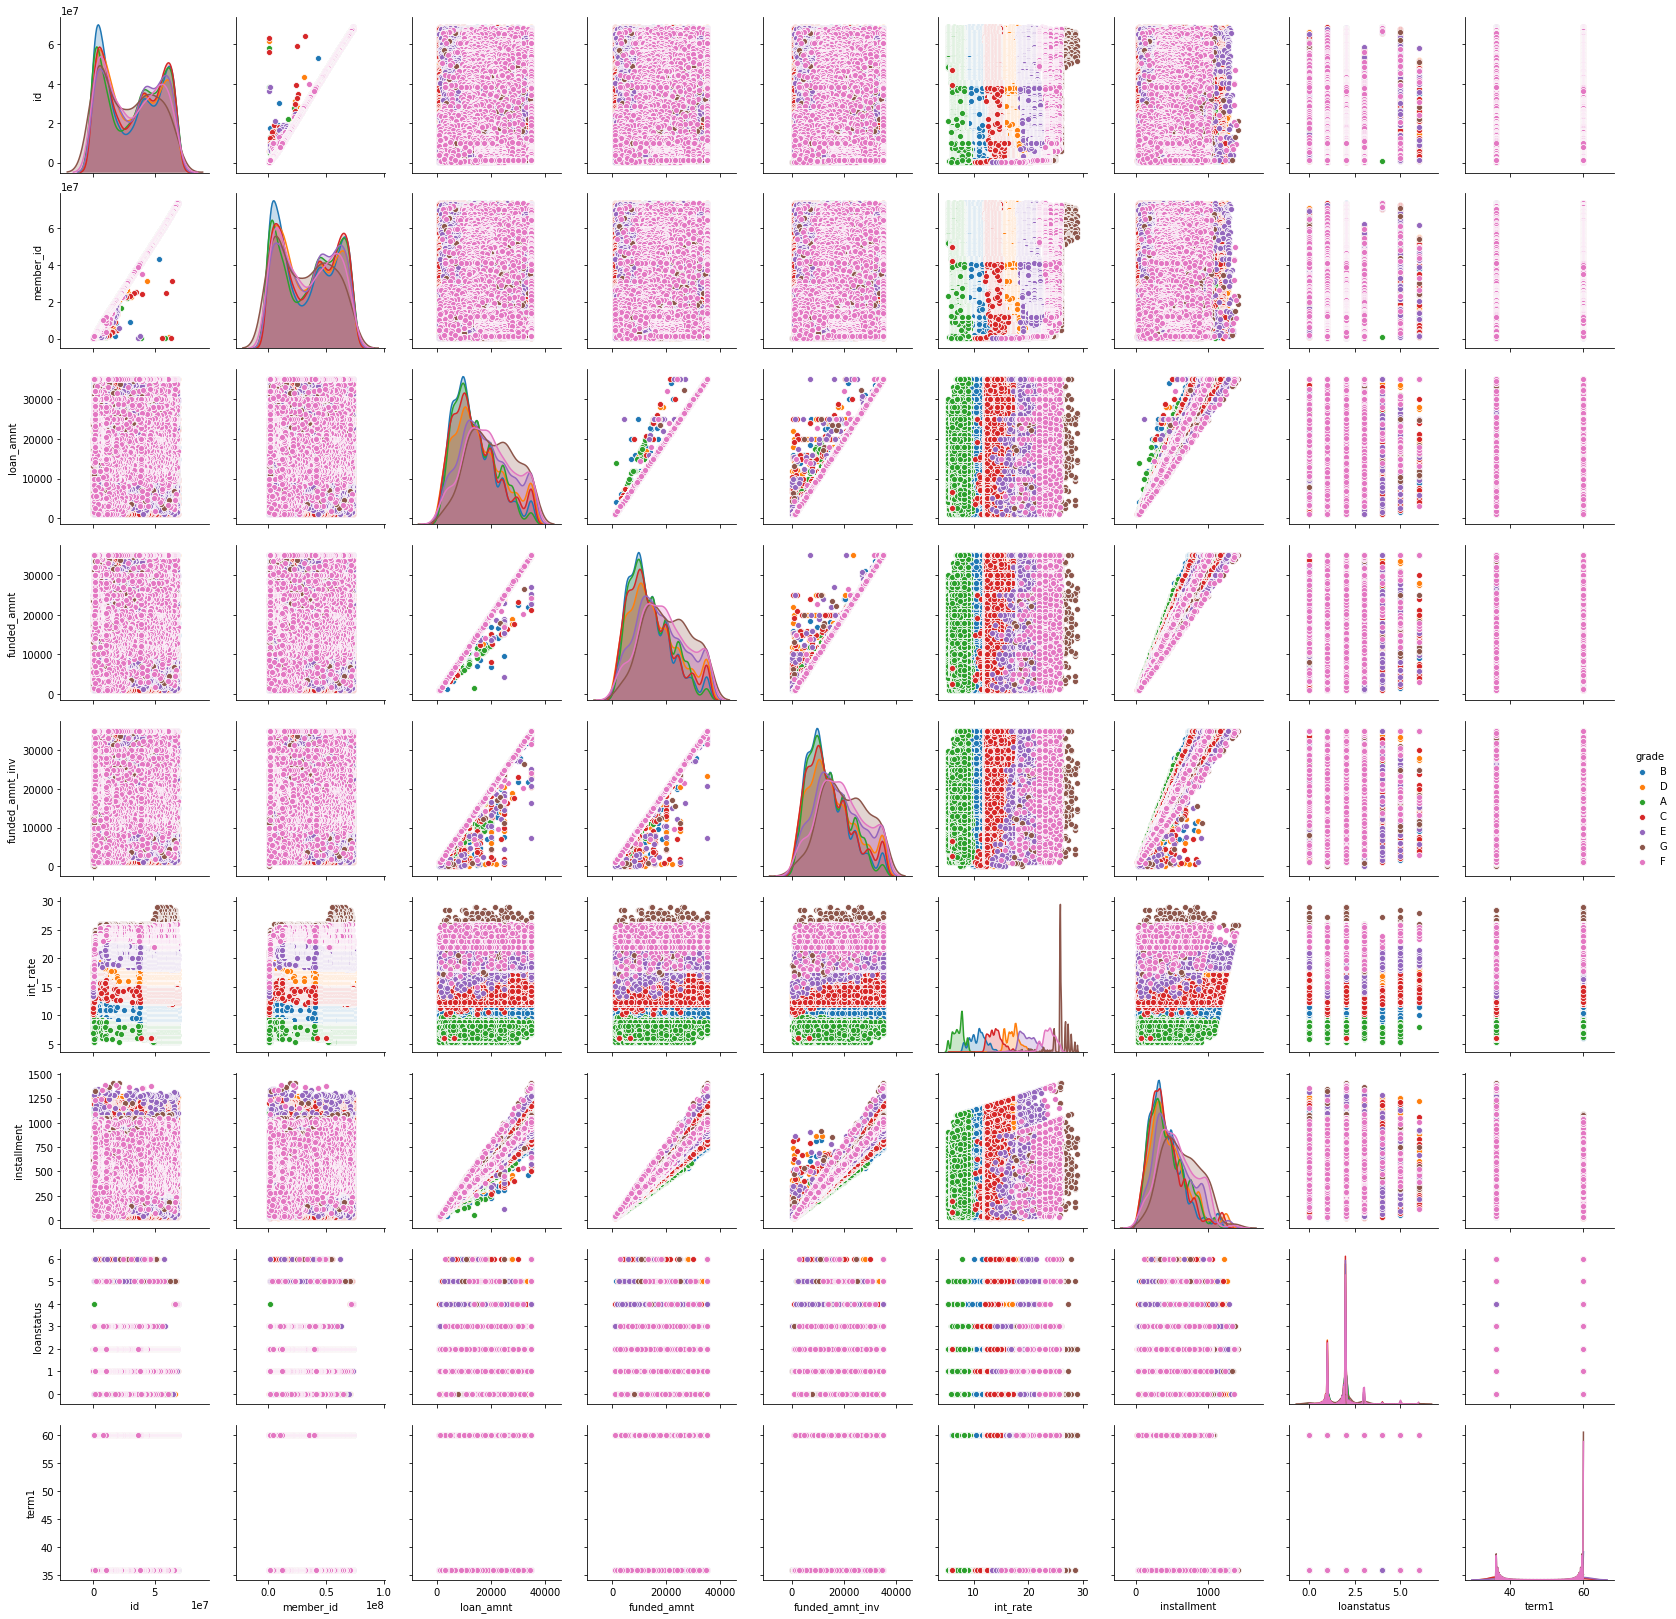

In [18]:
sns.pairplot(data2, hue='grade')

In [19]:
Y=data2['loanstatus']

In [20]:
X=data2[['installment','int_rate','loan_amnt','funded_amnt']]

In [21]:
model=LinearRegression()

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [23]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.coef_

array([-5.34652810e-04,  3.38084072e-03, -6.90353535e-05,  8.79678800e-05])

In [25]:
model.predict(X_test)

array([1.79373885, 1.7893981 , 1.90033081, ..., 1.7931899 , 1.99305965,
       1.77735549])

In [26]:
metrics.mean_absolute_error(Y_test, model.predict(X_test))

0.44191408762700474

In [27]:
metrics.mean_squared_error(model.predict(X_test), Y_test)

0.43187403319565376

In [28]:
metrics.mean_squared_log_error(model.predict(X_test), Y_test)

0.0602868518498494

In [29]:
metrics.r2_score(model.predict(X_test), Y_test)

-111.40957298716819

In [30]:
data2.to_csv("data2.csv")

In [31]:
data2['loanstatus'].value_counts()

2    40171
1    13980
3     3074
0      926
4      552
5      374
6       82
Name: loanstatus, dtype: int64

In [69]:
pd.read_csv('data2.csv')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,loanstatus,term1
0,0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,B,B2,1,36
1,15,1069759,1304871,1000.0,1000.0,1000.0,16.29,35.31,D,D1,1,36
2,30,1032111,1261745,4375.0,4375.0,4375.0,7.51,136.11,A,A3,1,36
3,45,1051117,1282787,14000.0,14000.0,14000.0,9.91,451.15,B,B1,1,36
4,60,1069142,1287810,13000.0,13000.0,13000.0,12.69,293.74,B,B5,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...
59154,887310,37077455,39840207,15600.0,15600.0,15600.0,10.49,335.23,B,B3,2,60
59155,887325,37147222,39919949,15000.0,15000.0,15000.0,15.59,361.52,D,D1,2,60
59156,887340,34593584,37276900,35000.0,35000.0,35000.0,14.31,820.03,C,C4,2,60
59157,887355,36331554,39042967,26950.0,26950.0,26950.0,8.19,846.88,A,A5,2,36


In [72]:
# def createt1():
#     conn = psycopg2.connect("host=almau-students.cmwfjvlei66t.eu-central-1.rds.amazonaws.com dbname=postgres user=postgres password=password port=5432")
#     cur = conn.cursor()
#     cur.execute("Create table if not exists group4 (InvoiceNo VARCHAR, Description VARCHAR, InvoiceDate DATE, InvoiceTime TIME )")
#     cur.execute("Create table if not exists group4.1 (StockCode VARCHAR, Quantity INTEGER, UnitPrice REAL, CustomerID REAL,Country VARCHAR)")
#     conn.commit()

In [73]:
# sql1="INSERT INTO group4 VALUES (%s, %s, %s, %s)"
# sql2="INSERT INTO group4.1 VALUES (%s, %s, %s, %s, %s)"

In [74]:

# conn = psycopg2.connect("host=almau-students.cmwfjvlei66t.eu-central-1.rds.amazonaws.com dbname=postgres user=postgres password=password port=5432")
# cur = conn.cursor()
# createt1()
# i = 0
# while i < data1['InvoiceNo'].count():
#     cur.execute(sql1,list(rows1.loc[i]))
#     i+=1
# conn.commit()
# i = 0
# while i < data2['Quantity'].count():
#     cur.execute(sql2,list(rows2.loc[i]))
#     i+=1
# conn.commit()